In [23]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import symmetric_top as sy

First of all, we will consider a top that is spinning whose rotation axis is at rest. The initial conditions are:

$\theta(0)=\theta_0$

$\dot{\theta}(0) = 0$

$\dot{\phi}(0) = 0$

we can add the additional boundary condition

$\dot{\psi}(0)=\dot{\psi}_0$

which implies

$\alpha = \left( \dot{\theta}_0^2+\dot{\phi}_0^2\sin^2(\theta_0)\right) + 2\frac{Mgl}{I}\cos(\theta_0) = \beta\cos(\theta_0) $

$ a = \frac{I_3}{I} \dot{\psi}_0 $

$ b = \frac{I_3}{I} \dot{\psi}_0 \cos(\theta_0) = a\cos(\theta_0) $

In [24]:
#condition 1
#cond = np.array([1.0, np.pi/6.0, 0.5, 2.0])
#num_pers = 3
# condition 2 - slower top
#cond = np.array([2.0, np.pi/6.0, 0.25, 2.0])
#num_pers = 3
# condition 3 - faster top
cond = np.array([1.0, np.pi/6.0, 1.0, 2.0])
num_pers = 4

In [25]:
beta = cond[0]
theta_0 = cond[1]
d_psi_0 = cond[2]
i_rat = cond[3]

In [26]:
alpha = beta*np.cos(theta_0)
a = i_rat*d_psi_0
b = a*np.cos(theta_0)

In [27]:
st = sy.SymTopIniCond(alpha, beta, a, b, i_rat)

Motion confined between  0.523598775598  and  0.706426549056
Half period is 2.0171892362970265


In [28]:
print('This is the smallest value', st.u_l)
print('This is the largest value ', st.u_r)
print('This is u prime ', st.u_prime)

This is the smallest value 0.7606863250720458
This is the largest value  0.8660254037843794
This is u prime  0.866025403784


In [29]:
num_pnts = 200
num_periods = num_pers
sol = st.solv_eqn(num_pnts, num_periods)

<IPython.core.display.Javascript object>


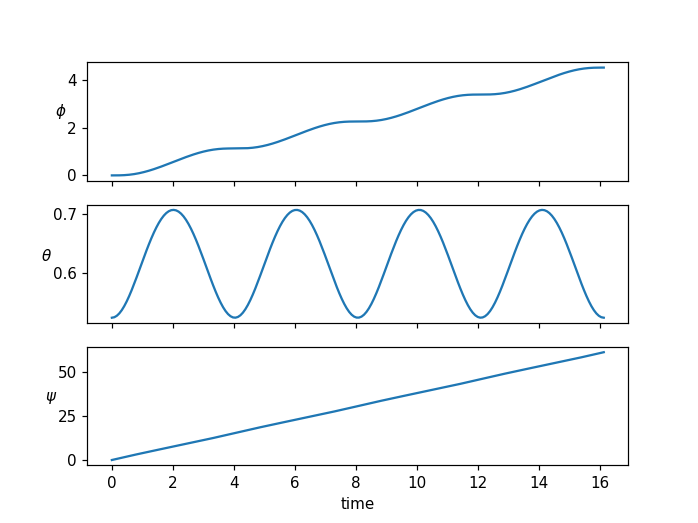

In [30]:
fig, ax = plt.subplots(3, sharex=True)
var = [r'$\phi$', r'$\theta$', r'$\psi$']
for ind in range(3):
    ax[ind].plot(st.time, sol[:, ind])    
    yl = ax[ind].set_ylabel(var[ind])
    yl.set_rotation(0)
ax[2].set_xlabel('time')
plt.show()

In [21]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D

<IPython.core.display.Javascript object>


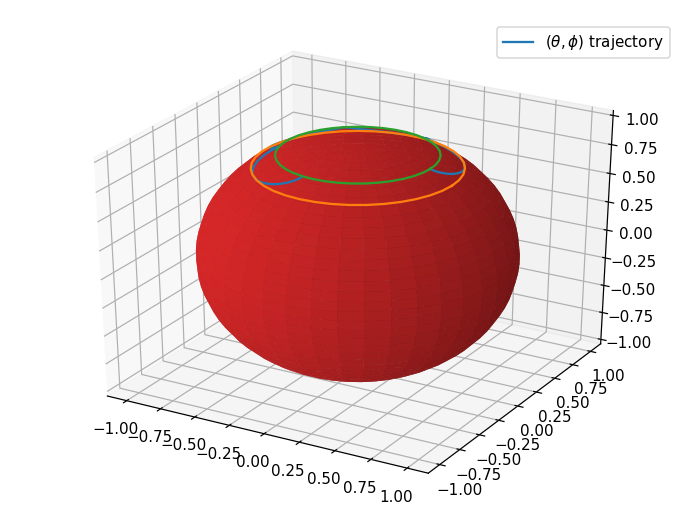

In [22]:
%matplotlib notebook
fig = plt.figure()
ax = fig.gca(projection='3d')

x = np.sin(sol[:, 1])*np.cos(sol[:, 0])
y = np.sin(sol[:, 1])*np.sin(sol[:, 0])
z = np.cos(sol[:, 1])
ax.plot(x, y, z, label=r'$(\theta, \phi)$ trajectory')

num = 40
us = np.linspace(0, np.pi, num)
vs = np.linspace(0, 2 * np.pi, num)

theta = [st.th_1, st.th_2]
for inv, th in enumerate(theta):
    x = np.sin(th)*np.cos(vs)
    y = np.sin(th)*np.sin(vs)
    z = np.cos(th)
    ax.plot(x, y, z)

xs = np.outer(np.sin(us), np.sin(vs))
ys = np.outer(np.sin(us), np.cos(vs))
zs = np.outer(np.cos(us), np.ones_like(vs))
ax.plot_surface(xs, ys, zs, linewidth=0)

ax.legend()
fig.tight_layout()
plt.show()

In [12]:
print(np.pi/6.0)

0.5235987755982988


In [13]:
print(sol[-1])

[  8.48863296   0.52359881  68.18172303]


In [11]:
print(2*np.pi)

6.283185307179586
